In [1]:
import deeplenstronomy.deeplenstronomy as dl
from pathlib import Path
import numpy as np
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt

In [2]:
def rename_result(name, head):
    datapath = head / f'data/{name}'
    imgpath = datapath / 'CONFIGURATION_1_images.npy'
    mdpath = datapath / 'CONFIGURATION_1_metadata.csv'
    if imgpath.exists():
        imgpath.rename(datapath / (datapath.name + '.npy'))
    if mdpath.exists():
        mdpath.rename(datapath / (datapath.name + '_metadata.csv'))

In [ ]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/delve_target.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 11 M 57 S         


In [ ]:
rename_result('delve_target_3', head)

In [ ]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/delve_source.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

In [ ]:
rename_result('delve_source_3', head)

In [148]:
# Define data visualization function
def visualize_data(data):
    '''
    visualizes 16 random images from dataset
    '''
    
    data_length = len(data)
    num_indices = 16
    
    # Generate 15 unique random indices using numpy
    random_indices = np.random.choice(data_length, size=num_indices, replace=False)

    #plot the examples for source
    fig1=plt.figure(figsize=(8,8))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.axis("off")

        img = data[random_indices[i]]
        example_image = make_lupton_rgb(img[2], img[1], img[0]) #change band by switching 0:1 to 1:2 or 2:3

        plt.imshow(example_image, aspect='auto')


In [149]:
head = Path.cwd().parents[1]
source_img_path = head / 'data/delve_source_test/delve_source_test.npy'
source_meta = head / 'data/delve_source_test/delve_source_test_metadata.csv'

targ_img_path = head / 'data/delve_target_test/delve_target_test.npy'
targ_meta = head / 'data/delve_target_test/delve_target_test_metadata.csv'

In [150]:
sdata = np.load(source_img_path)
tdata = np.load(targ_img_path)

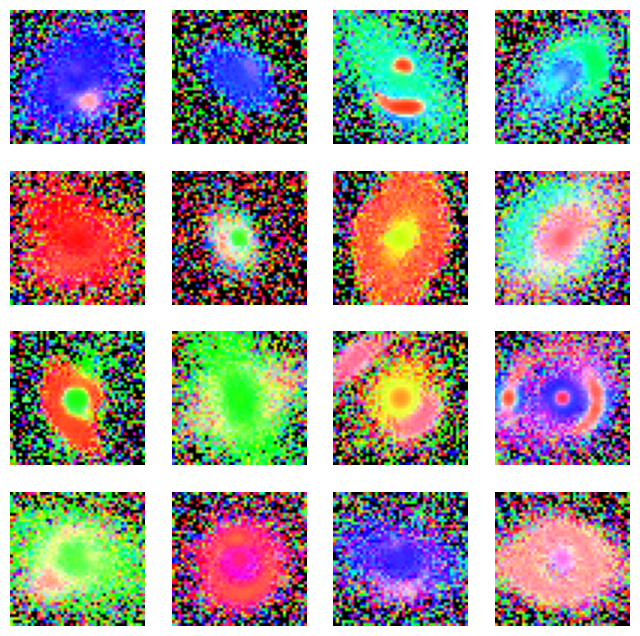

In [151]:
visualize_data(sdata)

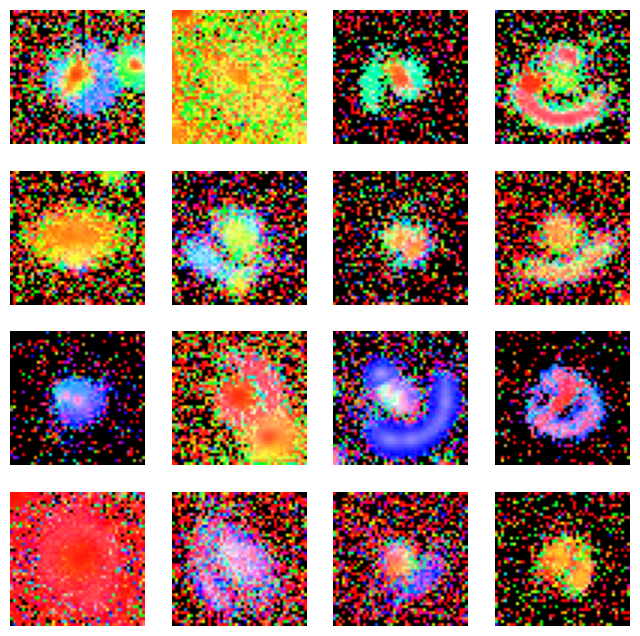

In [152]:
visualize_data(tdata)

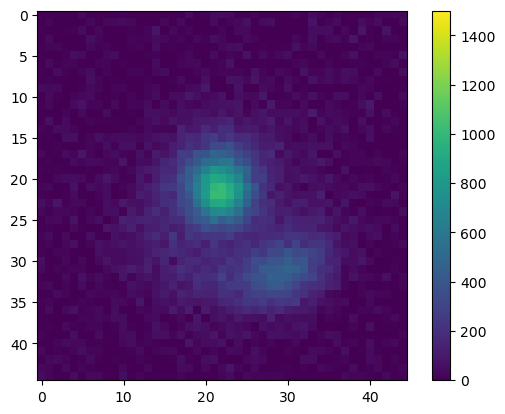

In [160]:
plt.imshow(sdata[0, 0, :, :], vmin = 0, vmax = 1500)
plt.colorbar()

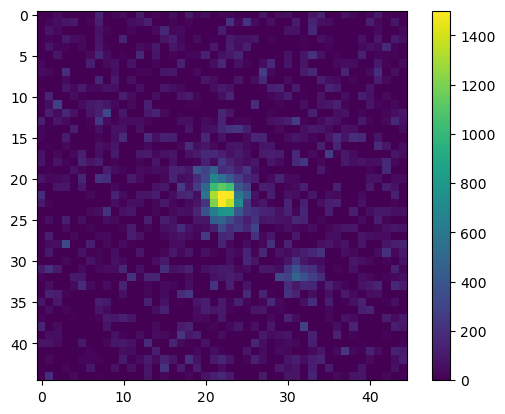

In [166]:
plt.imshow(tdata[22, 2, :, :], vmin = 0, vmax = 1500)
plt.colorbar()

In [ ]:
  USERDIST_2:
    FILENAME: ../configs/user_lens_g.txt
    MODE: interpolate
    STEP: 100
  USERDIST_3:
    FILENAME: ../configs/user_lens_r.txt
    MODE: interpolate
    STEP: 100
  USERDIST_4:
    FILENAME: ../configs/user_lens_z.txt
    MODE: interpolate
    STEP: 100

In [35]:
import pandas as pd
source_z = Path.cwd().parent / 'backgrounds/map.txt'
t = pd.read_csv(source_z, delim_whitespace = True)

In [36]:
t

,exposure_time-g,exposure_time-r,exposure_time-i,exposure_time-z,magnitude_zero_point-g,magnitude_zero_point-r,magnitude_zero_point-i,magnitude_zero_point-z
0,108.0,40.0,160.0,240.0,31.638035,30.699394,32.277115,32.466034
1,90.0,63.0,90.0,180.0,31.477333,31.402504,31.648746,31.838460
2,90.0,40.0,70.0,30.0,31.616297,30.695173,31.333422,30.025328
3,86.0,86.0,100.0,87.0,31.450940,31.573170,31.691639,31.273110
4,90.0,30.0,160.0,30.0,31.548435,30.458015,32.259125,30.167582
...,...,...,...,...,...,...,...,...
20569,90.0,53.0,90.0,172.0,31.553034,31.141245,31.718100,32.090130
20570,114.0,122.0,90.0,100.0,31.624949,31.978525,31.704601,31.498419
20571,200.0,200.0,200.0,60.0,32.446670,32.622753,32.552940,30.985960
20572,40.0,100.0,90.0,113.0,30.642925,31.843204,31.632883,31.618350


In [37]:
t = t.drop(columns = ['exposure_time-i', 'magnitude_zero_point-i'])

In [39]:
t[['magnitude_zero_point-g', 'magnitude_zero_point-r', 'magnitude_zero_point-z']] = t[['magnitude_zero_point-g', 'magnitude_zero_point-r', 'magnitude_zero_point-z']].round(6)

In [40]:
t.to_csv('../backgrounds/map.txt', sep='\t', index = False)

In [30]:
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_lenscolor_source/mb_lenscolor_source.npy'
source_meta = head / 'data/mb_lenscolor_source/mb_lenscolor_source_metadata.csv'

In [31]:
import pandas as pd
t = pd.read_csv(source_meta)

In [53]:
idx = [i[16:] for i in dataset.search('magnitude')['SOURCE']]

In [54]:
idx

['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g',
 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r',
 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']

t[idx]

In [42]:
t.keys()

Index(['OBJID-g', 'H0-g', 'Om0-g', 'exposure_time-g', 'numPix-g',
       'pixel_scale-g', 'psf_type-g', 'read_noise-g', 'ccd_gain-g', 'seeing-g',
       ...
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-e2-z',
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-center_x-z',
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-center_y-z', 'BACKGROUND_IDX-z',
       'PLANE_1-REDSHIFT-g', 'PLANE_2-REDSHIFT-g', 'PLANE_1-REDSHIFT-r',
       'PLANE_2-REDSHIFT-r', 'PLANE_1-REDSHIFT-z', 'PLANE_2-REDSHIFT-z'],
      dtype='object', length=195)